<a href="https://colab.research.google.com/github/Mena-E/Women-in-congress/blob/main/Women_Long_Life_Happiness_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Happiness and Long Life:**
##Is more women in congress the answer?

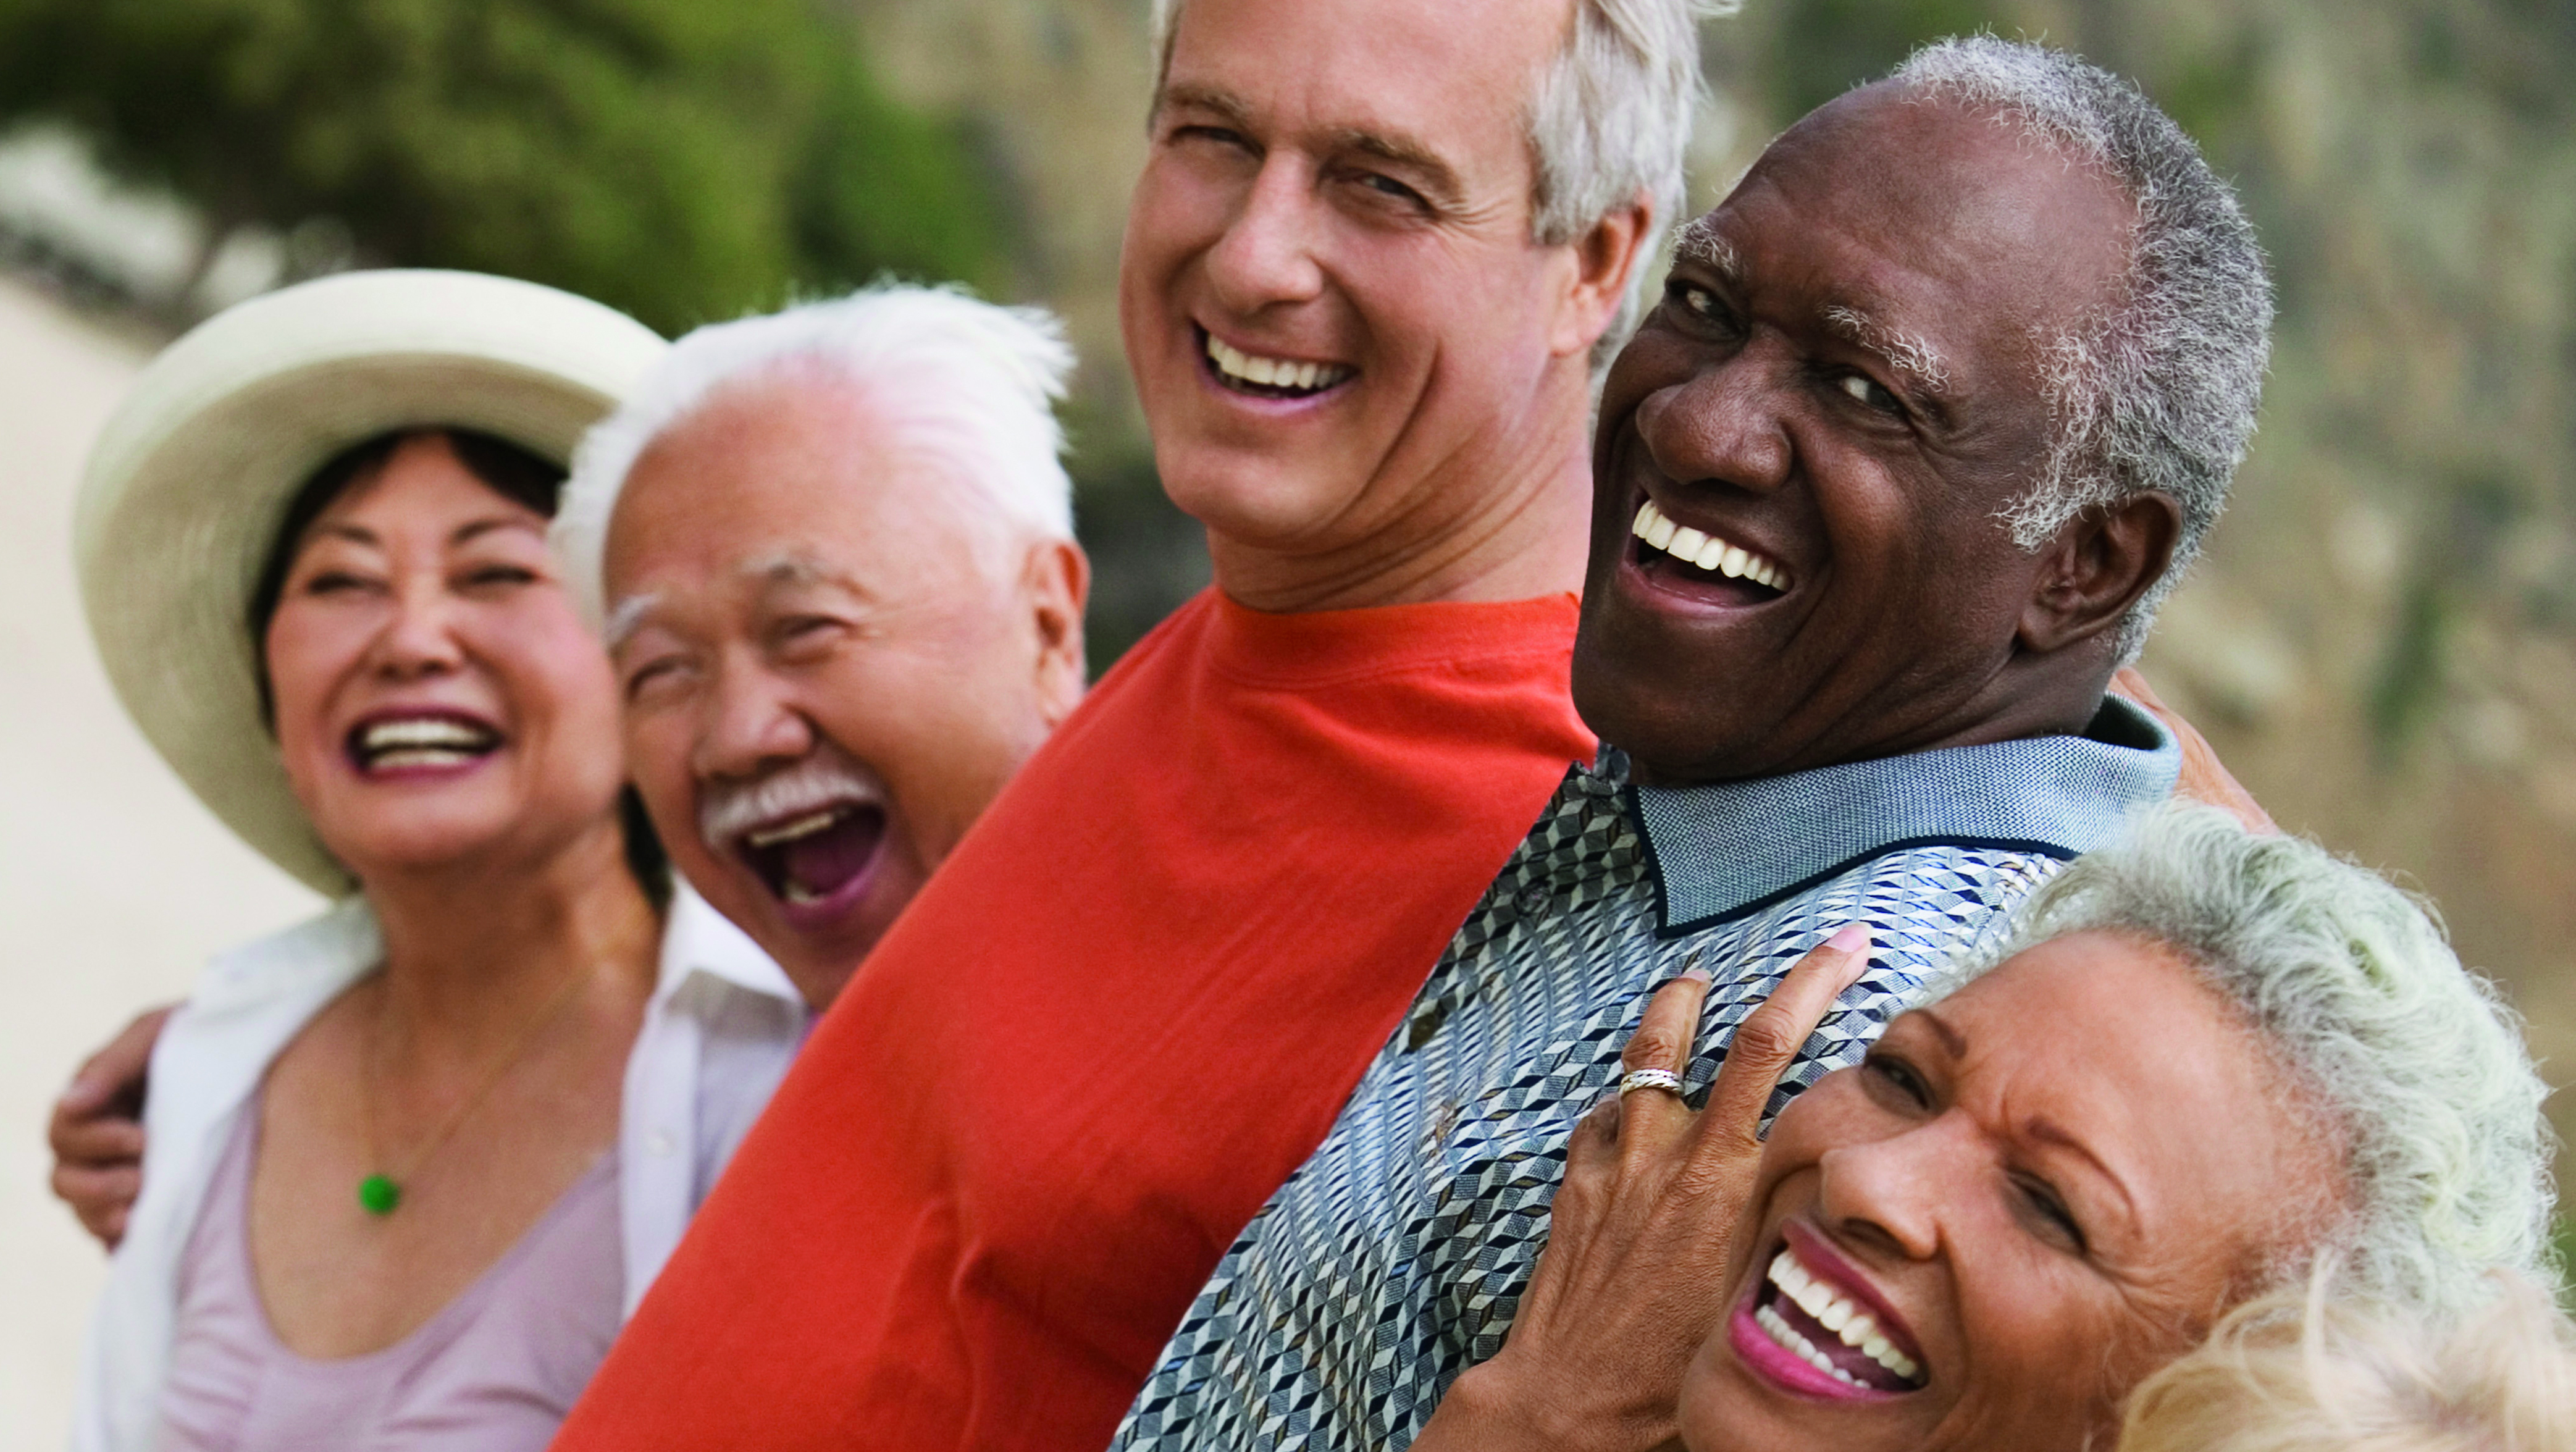

##Table of Content



1. [Introduction](#Intro)
2. [Description of data files](#Description)
3. [Import Data to Notebook](#import)
4. [Data Cleaning Function and Function Call](#function)
5. [Dataframes Display and Exploration](#Explore)
6. [Merging the Dataframes](#merging)
7. [Women in Parliament and life expectancy?](#Research1)
8. [Women in Parliament and percent Happiness](#Research2)
9. [Percent Happiness and Life Expectancy](#Research3)
10.[Animated Bubble Plot of Life Expectancy and Happiness Score](#animation)
11.[Conclusion, Limimtation and Outlook](#conclusion)





<a name='Intro'></a>

## 1. Introduction

> This study aims at investigating the realtionship between the percentage of women in parliament, or high political office, and the average life expectancy and happiness across a collection of countries in the world. Two main questions will be answered in this project.

> For the first question we investigate whether the countries in the dataset with a higher percentage of women in Parliament or congress have higher life expectancies on average than the countries with a lower percentage of women in Parliament. The countries will be split into two groups, one higher and the other lower percenatge of women in Parliamnent, then the mean of the their life expectancies will be studied with a two sample t-test to obtain a p-value and test for significance.

> The methodology for answering the second question will be same as the first, but this time we will be answering the question of whether countries with higher percentages of women in Parliament have a higher happiness score on average when compared with their counterparts. The means of the happiness scores will be tested.

> The project concludes with a regression analysis where we will be checking to see if there is any relationship between happiness score and life expectancy in the dataset. How right will an OLS model be if it used to predict average life expectancy of a country based on the country's happiness score? Limations of the model will be briefly discussed.

<a name='Description'></a>

## 2. Description of data files

>Three data files were used for this project, and they were all downloaded from [Gapminder](https://gapminder.org/data). The files were all in wide format with a similar first column named 'country', while the other columns span the years for which data was gathered for each file. The following is ahort description of the files.

> **Life Expectancy**: This data file was described on the Gapminder site as the average number of years anewborn child would live if current mortality patterns were to stay the same. The country column held the name of the country studied, and the year columns ranged from 1800 and projected up to 2100.

> **Percentage of women in parliaments**: This was described as the percentage of national parliamentary seats held by women in both lower and upper houses combined. So in the United States for example, this would be the percentage of women in both the House and Senate. Data ranged from 1945 to 2020.

> **Happiness Score** This was described as the average response to the question of life evaluations asking the following "Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you.On which step of the ladder would you say you personally feel you stand at this time?" This measure is also referred to as *Cantril life ladder*. The values will be converted to percentages for the purpose of this study. This data ranged from the year 2005 to 2019.

In [ ]:
# Import statements
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from scipy import stats
#from statsmodels.formula.api import ols
#import pandas.util.testing as tm
import plotly.express as px

In [ ]:
pip install chart_studio

In [ ]:
import chart_studio
username = 'mena2020'
api_key = 'M3TxveRJbQqmmOT1eI8x'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
import chart_studio.plotly as py
import chart_studio.tools as tls

<a name="import"></a>
##3. Import Data to Notebook

In [ ]:
# Imported three csv files locally; files were downloaded from Gapminder
life = pd.read_csv('/content/drive/MyDrive/Lambda/life_expectancy_years.csv')
percent_women_in_parliament = pd.read_csv('/content/drive/MyDrive/Lambda/wn_bothhouses_c.csv')
happiness = pd.read_csv('/content/drive/MyDrive/Lambda/hapiscore_whr.csv')

<a name="function"></a>
## 4. Data Cleaning Function and Function call

In [ ]:
def fixmydf(dframe, variable_name):
  """
  This function takes in a dataframe, and a string (variable_name).
  It replaces the null values in the dataframe with zeros, then converts
  the datframe from its wide format into a long format usimng pandas
  .melt() function. The created variable in the new long format is then
  name wjatever is entered as the variable_name string.
  """
  dframe.fillna(0, inplace=True)
  new_dframe = pd.melt(dframe, id_vars='country', var_name='year', value_name=variable_name)
  return new_dframe


In [ ]:
# Calling the fixmydf function on the three downloaded csv files
life = fixmydf(life, 'life_expectancy_yrs')
percent_women_in_parliament = fixmydf(percent_women_in_parliament, 'proportion_women_in_parliament')
happiness = fixmydf(happiness, 'happy_score')

<a name="Explore"></a>
##5. Dataframes Display and Exploration

In [ ]:
print(life.shape)
life.head(2)

(56287, 3)


country  year  life_expectancy_yrs
0  Afghanistan  1800                 28.2
1      Albania  1800                 35.4

In [ ]:
print(percent_women_in_parliament.shape)
percent_women_in_parliament.head(2)

(14668, 3)


country  year  proportion_women_in_parliament
0  Afghanistan  1945                          0.0000
1      Albania  1945                          0.0366

In [ ]:
# Create a new feature in the percent_women_in_parliament dataframe to represent proportion of women in parliamnet as a percentage
percent_women_in_parliament['pct_women_in_parl'] = percent_women_in_parliament['proportion_women_in_parliament']*100
del percent_women_in_parliament['proportion_women_in_parliament']
percent_women_in_parliament.head(2)

country  year  pct_women_in_parl
0  Afghanistan  1945               0.00
1      Albania  1945               3.66

In [ ]:
print(happiness.shape)
happiness.head(2)

(2415, 3)


country  year  happy_score
0  Afghanistan  2005          0.0
1      Albania  2005          0.0

In [ ]:
# Create a new feature in the happiness dataframe to convert proportions of the happiness score to percentage
happiness['happiness_score'] = happiness['happy_score'] *100
del happiness['happy_score']
happiness.tail(2)

country  year  happiness_score
2413    Zambia  2019             37.6
2414  Zimbabwe  2019             33.0

<a name="merging"></a>

##6. Merging the Dataframes

In [ ]:
# Here we create a new dataframe called life_women by merging the life dataframe with the percent_women_in_parliament dataframe
life_women = pd.merge(life, percent_women_in_parliament, on=['country','year'], how='inner')
print(life_women.shape)
life_women.head(2)

(14136, 4)


country  year  life_expectancy_yrs  pct_women_in_parl
0  Afghanistan  1945                 32.2               0.00
1      Albania  1945                 47.0               3.66

In [ ]:
# Now we create a new dataframe called life_happy by merging the life_women dataframe with the happiness dataframe
life_happy = pd.merge(life_women, happiness, on = ['country', 'year'], how = 'inner')
print(life_happy.shape)
life_happy.head(2)

(2400, 5)


country  year  life_expectancy_yrs  pct_women_in_parl  happiness_score
0  Afghanistan  2005                 57.4              25.90              0.0
1      Albania  2005                 76.0               7.14              0.0

In [ ]:
# For our final dataframe we group the data in life_happy by country and take the mean of all the features
final_df = life_happy.groupby('country', as_index=False).mean()
print(final_df.shape)
final_df.head(2)

(160, 4)


country  life_expectancy_yrs  pct_women_in_parl  happiness_score
0  Afghanistan            60.553333          27.213333        28.873333
1      Albania            77.586667          18.286667        39.846667

In [ ]:
# used figures from column description to split the column into four categories
# min, 25%, 50%, 75% and max will be used as bins to categorize column elements
final_df['pct_women_in_parl'].describe()

count    160.000000
mean      19.713392
std       10.950133
min        0.571333
25%       12.447667
50%       17.425667
75%       26.148333
max       54.880000
Name: pct_women_in_parl, dtype: float64

In [ ]:
# inputed bins to split pct_wm_parl into two categories
bin_edges = [0.571333, 17.425667, 54.88]
bin_names = ['low','high']
final_df['level_women_in_parl'] = pd.cut(final_df['pct_women_in_parl'], bin_edges, labels = bin_names)
final_df.head()

country  life_expectancy_yrs  ...  happiness_score  level_women_in_parl
0  Afghanistan            60.553333  ...        28.873333                 high
1      Albania            77.586667  ...        39.846667                 high
2      Algeria            76.680000  ...        28.913333                  low
3       Angola            60.966667  ...        11.786667                 high
4    Argentina            76.040000  ...        59.086667                 high

[5 rows x 5 columns]

In [ ]:
final_df['happiness_score'].describe()

count    160.000000
mean      40.812750
std       16.304782
min        3.466667
25%       29.716667
50%       42.263333
75%       52.233333
max       71.760000
Name: happiness_score, dtype: float64

In [ ]:
# inputed bins to split pct_wm_parl into four categories
bin_edges = [3.466660, 42.263333, 71.76]
bin_names = ['low','high']
final_df['level_happiness'] = pd.cut(final_df['happiness_score'], bin_edges, labels = bin_names)
final_df.head()

country  life_expectancy_yrs  ...  level_women_in_parl  level_happiness
0  Afghanistan            60.553333  ...                 high              low
1      Albania            77.586667  ...                 high              low
2      Algeria            76.680000  ...                  low              low
3       Angola            60.966667  ...                 high              low
4    Argentina            76.040000  ...                 high             high

[5 rows x 6 columns]

<a name="Research1"></a>
##7. Women in Parliement and Life Expectancy

###Do countries with higher percentages of women in parliament have higher life expectancies?

In [ ]:
# Split the final_df dataframe into two halves of high % and low % of women in parliament
high_women = final_df.query("level_women_in_parl == 'high'")
low_women = final_df.query("level_women_in_parl == 'low'")

mean_high = high_women['life_expectancy_yrs'].mean()
mean_low = low_women['life_expectancy_yrs'].mean()

print("The mean life expectancies for countries with high and\n\
low percentages of women in Parliament:")
print("---------------------------------------------------")
print("High percentage of women in parliament: {} yrs.".format(round(mean_high, 1)))
print("Low percentage of women in parliament: {} yrs.".format(round(mean_low, 1)))

The mean life expectancies for countries with high and
low percentages of women in Parliament:
---------------------------------------------------
High percentage of women in parliament: 73.1 yrs.
Low percentage of women in parliament: 69.7 yrs.


### 7a. Mean of Life Expectancies
> We find from the calculation of the means for the two groups that the countries with a higher percenatge of women has a mean life expectancy of about **73.1yrs**, while the countries with lower percentage of women in parliament has a mean life expecatncy of **69.7yrs**. To verify if the difference of the means is statistically significant, we will run a two sample t-test

### 7b. Two Sample t-test at alpha = 0.05

#####Null Hypothesis:

The difference in means of life expectancies between countries with high percentage of women in parliament and countries with low percenatage of women in parliament **is equal to zero**.

$H_0: \mu_{high} - \mu_{low} = 0$

#####Alternative Hypothesis:

The difference in means of life expectancies between countries with high percentage of women in parliament and countries with low percenatage of women in parliament **is not equal to zero**.

$H_0: \mu_{high} - \mu_{low} \neq 0$


In [ ]:
# find the p-value
high = high_women['life_expectancy_yrs']
low = low_women['life_expectancy_yrs']

t, p = stats.ttest_ind(high, low, equal_var=True)
print("The p-value is {}".format(round(p,4)))

The p-value is 0.0097


###7c. T-test Result

> The p-value was calculated to be **0.0097**, so we will reject the null hypothesis and conclude that the difference in means of life expectancies between countries with a high percentage of women in parliament and countries with a low percenatage of women in parliament **is not equal to zero** and statistically significant at the 0.05 alpha level. So one could state that it is most likely the case that countries with a higher percentage of women in parliament have higher life expectancies on average.

###7d. Miscelaneous Visualizations for Women in Parliament and Life Expectancy

In [ ]:
# Violin Plots
violin_life = px.violin(final_df,  x="level_women_in_parl", y="life_expectancy_yrs", box=True, points ="all")
violin_life.update_layout(title_text='Violin Plots of Life Expectancy V Level of women in Parliament')
violin_life.show()

In [ ]:
# Bar plot of top twenty countries with highest perecent of women in parliament
sorted_df = final_df.sort_values(by = 'pct_women_in_parl', ascending=False, ignore_index=True)
bar_life = px.bar(sorted_df.head(20), x="pct_women_in_parl", y="country",orientation='h',
             hover_data=["pct_women_in_parl", "life_expectancy_yrs"], height = 600,
             title='Countries with the highest percenatge of women in Parliament')
bar_life.show()

<a name='Research2'></a>
##8. Women in Parliament and percent Happiness

###Are people in countries with a higher percentage of women in parliament happier on average than people in countries with lower percentages?

In [ ]:
# Use the split dataframes from Research Question 1: high_women and low_women
# Calculate the means of percent happiness

mean_high_happy = high_women['happiness_score'].mean()
mean_low_happy = low_women['happiness_score'].mean()

print("The mean happiness score for countries with high and\n\
low proportions of women in Parliament:")
print("---------------------------------------------------")
print("High percentage of women in parliament: {}%.".format(round(mean_high_happy, 1)))
print("Low percentage of women in parliament: {}%.".format(round(mean_low_happy, 1)))

The mean happiness score for countries with high and
low proportions of women in Parliament:
---------------------------------------------------
High percentage of women in parliament: 45.1%.
Low percentage of women in parliament: 36.6%.


### 8a. Mean of Percent Happiness
> We find from the calculation of the means for the two groups that the countries with a higher percenatge of women has a mean percent happiness of about **45.1%**, while the countries with lower percentage of women in parliament has a mean percent happiness of about **36.6%**. To verufy if the difference of the means is statistically significant, we will run a two sample t-test

### 8b. Two Sample t-test at alpha = 0.05

#####Null Hypothesis:

The difference in means of percent happiness between countries with high percentage of women in parliament and countries with low percenatage of women in parliament **is equal to zero**.

$H_0: \mu_{high} - \mu_{low} = 0$

#####Alternative Hypothesis:

The difference in means of percent happiness between countries with high percentage of women in parliament and countries with low percenatage of women in parliament **is not equal to zero**.

$H_0: \mu_{high} - \mu_{low} \neq 0$

In [ ]:
# find the p-value
high = high_women['happiness_score']
low = low_women['happiness_score']

t, p = stats.ttest_ind(high, low, equal_var=True)
print("The p-value is {}".format(round(p,4)))

The p-value is 0.0009


###8c. T-test Result

> The p-value was calculated to be **0.0009**, so we will reject the null hypothesis and conclude that the difference in means of percent happiness between countries with a high percentage of women in parliament and countries with a low percenatage of women in parliament **is not equal to zero** and statistically significant at the 0.05 alpha level.

###8d. Micelaneous Visualization for Women in Parliament and Happinness

In [ ]:
# Box Plot of Percent Happiness by level of women in Parliament
box_life = px.box(final_df, x='level_women_in_parl', y='happiness_score',notched=True,
             title="Box plot of Happiness Score")
box_life.show()

In [ ]:
# Bar plot of top twenty happiest countries
sorted_df = final_df.sort_values(by = 'happiness_score', ascending=False, ignore_index=True)
bar_happy = px.bar(sorted_df.head(20), x="happiness_score", y="country", orientation='h',
             hover_data=["pct_women_in_parl", "life_expectancy_yrs"], height = 600,
             title='Countries with the highest percent happiness score')
bar_happy.show()

<a name='Research3'></a>
## 9. Percent Happiness and Life Expectancy
###Is there a relationship between percent happiness and life expectancy?

###9a. Regression Analysis/Regression Plot

In [ ]:
regression_plot = px.scatter(final_df, x= 'happiness_score', y = 'life_expectancy_yrs', trendline="ols")
regression_plot.show()

results = px.get_trendline_results(regression_plot)
print(results.px_fit_results.iloc[0].summary())

#results.query("sex == 'Male' and smoker == 'Yes'").px_fit_results.iloc[0].summary()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     77.98
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.88e-15
Time:                        12:34:03   Log-Likelihood:                -532.29
No. Observations:                 160   AIC:                             1069.
Df Residuals:                     158   BIC:                             1075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.5345      1.449     41.087      0.0

###9b. Regression Plot

###9c. Model Prediction Examples

In [ ]:
# Model prediction example - Nigeria
final_df[final_df['country']=='Nigeria']

country  life_expectancy_yrs  ...  level_women_in_parl  level_happiness
107  Nigeria            61.513333  ...                  low              low

[1 rows x 6 columns]

In [ ]:
predict_Nigeria= 59.5345 + 0.2913 *40.02
print('Predicted life expectancy in Nigeria is {} yrs.'.format(round(predict_Nigeria,1)))

Predicted life expectancy in Nigeria is 71.2 yrs.


In [ ]:
# Model prediction example - United States
final_df[final_df['country']=='United States']

country  life_expectancy_yrs  ...  level_women_in_parl  level_happiness
152  United States            78.493333  ...                 high             high

[1 rows x 6 columns]

In [ ]:
predict_USA = 59.5345 + 0.2913 * 66.206667
print('Predicted life expectancy in the United States is {} yrs.'.format(round(predict_USA,1)))

Predicted life expectancy in the United States is 78.8 yrs.


###9d. Conclusion of Regression Analysis.

>With a p-value of 0.000 as shown in OLS Regression results table, we reject the null hypothesis and conclude that **there is a statistically significant relationship between perecnt happiness and life expectancy at the 0.05 alpha level.**

> Furthermore, the regression line shows a moderately positive correlation between percent happiness and life expectancy, and about 33% of the variability in life expectancy can be explained by changes in percent happiness.

> The model's predictive ability was tested with examples of two countries pulled from the datafram, United States and Nigeria. The model overpredicted the life expectancy for Nigeria, but was very accurate in predicting the lofe expectancy in the United States. Care should exercised if this model must be used; other factors affecting life expectancy in ones country of interest should be examined as well to better understand and explain the prediction variability.

### 9e. Miscellaneous Visualization of Life Expectancy and Happiness

In [ ]:
# Bubble Plot of Life Expectancy and Happiness
bubble_life = px.scatter(final_df, x = 'happiness_score', y = 'life_expectancy_yrs', 
                 size='pct_women_in_parl', hover_name='country', 
                 color='level_women_in_parl')
bubble_life.update_layout(title_text='Bubble Plot of Life Expectancy(yrs) V Happiness Score (%)')
bubble_life.show()

<a name='animation'></a>
###10. Animated Bubble Plot of Life Expectancy and Happiness Score

In [ ]:
# Merge life_happy and final_df dataframes to create plot_df dataframe as a first step to creating animation plot
plot_df = pd.merge(life_happy, final_df, on='country', how ='inner')
plot_df.head()

country  year  ...  level_women_in_parl  level_happiness
0  Afghanistan  2005  ...                 high              low
1  Afghanistan  2006  ...                 high              low
2  Afghanistan  2007  ...                 high              low
3  Afghanistan  2008  ...                 high              low
4  Afghanistan  2009  ...                 high              low

[5 rows x 10 columns]

In [71]:
# New feature created to fill zeros with values
plot_df['happiness_score'] = np.where(plot_df['happiness_score_x']==0, plot_df['happiness_score_y'], plot_df['happiness_score_x'])
plot_df.head()

country  year  ...  level_happiness  happiness_score
0  Afghanistan  2005  ...              low        28.873333
1  Afghanistan  2006  ...              low        28.873333
2  Afghanistan  2007  ...              low        28.873333
3  Afghanistan  2008  ...              low        37.200000
4  Afghanistan  2009  ...              low        44.000000

[5 rows x 11 columns]

In [72]:
# Drop the columns in plot_df originating from final_df except level_ columns
plot_df.drop(axis=1, columns=['happiness_score_x','life_expectancy_yrs_y','pct_women_in_parl_y','happiness_score_y'], inplace=True)
plot_df.head(2)

country  year  ...  level_happiness  happiness_score
0  Afghanistan  2005  ...              low        28.873333
1  Afghanistan  2006  ...              low        28.873333

[2 rows x 7 columns]

In [85]:
# Scatter/Bubble plot
animation_life = px.scatter(plot_df, x='happiness_score', y='life_expectancy_yrs_x', size = 'pct_women_in_parl_x',
           color='level_women_in_parl',hover_name='country',animation_frame='year',animation_group='country',
           range_x=[0,85], range_y=[30,90],labels=dict(happiness_score='Happiness Score (%)',
                                                         life_expectancy_yrs_x='Life Expectancy (yrs)',
                                                         pct_women_in_parl_x='Percent of women in Parliament'))
animation_life.show()

<a name='conclusion'></a>
###11. Conclusion, Limimtation and Outlook

> To the question of whether countries with a higher percenatge of women in parliament also have a higher life expetancy than countries who do not, I draw the conlusion that when a country has a higher percentage of women in parliament, chances are high that the country would also have a higher life expectancy. furthermore, I found that chances are also high that the countries with a higher percentage of women in parliament would also have a higher happiness score on average compared to their counterpart countries with fewer women in parliament. Finally the regression analysis found a relationship between happines score and life expectancy with a very moderately strong and positive correlation between the two variables.

> The original data files from Gapminder had missing values which I replaced with zeros prior to merging the files to create the final dataframe used for the analysis. Due to the varyin range of years across the three data files, the final dataframe I used for the analysis only had 160 countries it, with data for the happiness score file only running from 2005 to 2019. It is likely that results of the t-tests and the regression analysis would differ, for better or worse with more countries studies over a longer period of time.

> The future outlook for this project may include sourcing for more data on the proportions of womne in parliament in other countries not already in the database used for this study, with a final goal of testing if the results still hold. A secondary goal would be to invetsigate how other social factors combined with a higher percentage of women in parliamnet affect life expectancy and happiness. 